<a href="https://colab.research.google.com/github/Jeremylaby/Practical_aspects_of_deep_learning/blob/main/Binary-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary classification problem


Two-class classification, or binary classification, may be the most widely applied kind of machine learning problem. The aim of this lab is to classify movie reviews into “positive” reviews and “negative” reviews, just based on the text content of the reviews.

The IMDB dataset
We'll be working with the “IMDB dataset”, a set of 50,000 highly-polarized reviews from the Internet Movie Database. They are split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews. Just like the MNIST dataset, the IMDB dataset comes packaged with Keras. It has already been preprocessed: the reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionary.

In [16]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Preparing the data
We cannot feed lists of integers into a neural network. We have to turn our lists into tensors. There are two ways we could do that:

We could pad our lists so that they all have the same length, and turn them into an integer tensor of shape (samples, word_indices), then use as the first layer in our network a layer capable of handling such integer tensors (the Embedding layer, which we will cover in detail later in the book).
We could one-hot-encode our lists to turn them into vectors of 0s and 1s. Concretely, this would mean for instance turning the sequence [3, 5] into a 10,000-dimensional vector that would be all-zeros except for indices 3 and 5, which would be ones. Then we could use as the first layer in our network a Dense layer, capable of handling floating-point vector data.
Please implement the second solution:

In [17]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))  # Create an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [18]:
x_train.shape

(25000, 10000)

In [19]:
x_test.shape

(25000, 10000)

Network architecture
Based on the previous ex. please implement a deep network architecture shown in the following Figure:



I propose the following architecture choice:

Two intermediate layers with 16 hidden units each, and a third layer which will output the scalar prediction regarding the sentiment of the current review.
The intermediate layers will use relu as their “activation function”, and the final layer will use a sigmoid activation so as to output a probability (a score between 0 and 1, indicating how likely the sample is to have the target “1”, i.e. how likely the review is to be positive).
A relu (rectified linear unit) is a function meant to zero-out negative values, while a sigmoid “squashes” arbitrary values into the [0, 1] interval, thus outputting something that can be interpreted as a probability.

In [20]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
network.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
network.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [22]:
from sklearn.model_selection import train_test_split

x_val, x_test_final, y_val, y_test_final = train_test_split(
    x_test, y_test,
    test_size=15_000,
    random_state=0,
    stratify=y_test
)

Train the model with following parameters:

x_train, y_train -remained
epochs - 20
batch_size - 512
validation_data=(x_val, y_val))

In [23]:
history = network.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7420 - loss: 0.5615 - val_accuracy: 0.8702 - val_loss: 0.3583
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8968 - loss: 0.2999 - val_accuracy: 0.8864 - val_loss: 0.2957
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9219 - loss: 0.2233 - val_accuracy: 0.8802 - val_loss: 0.2972
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9347 - loss: 0.1864 - val_accuracy: 0.8837 - val_loss: 0.2917
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9466 - loss: 0.1580 - val_accuracy: 0.8839 - val_loss: 0.2951
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9508 - loss: 0.1475 - val_accuracy: 0.8808 - val_loss: 0.3123
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9552 - loss: 0.1296 - val_accuracy: 0.8773 - val_loss: 0.3297
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9595 - loss: 0.1180 - val_accuracy: 0.8733 - v

In [24]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

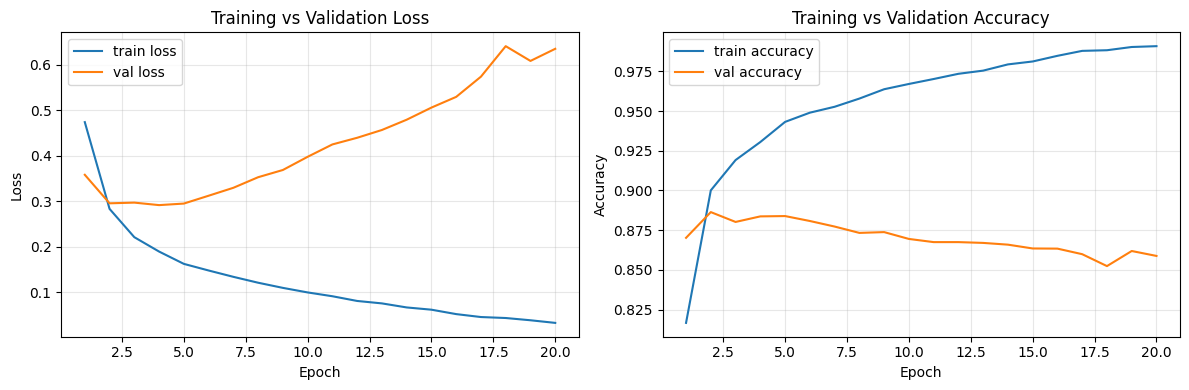

In [25]:
import matplotlib.pyplot as plt

h = history.history
epochs = range(1, len(h['accuracy']) + 1)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Left: Loss
axes[0].plot(epochs, h['loss'], label='train loss')
axes[0].plot(epochs, h['val_loss'], label='val loss')
axes[0].set_title('Training vs Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Right: Accuracy
axes[1].plot(epochs, h['accuracy'], label='train accuracy')
axes[1].plot(epochs, h['val_accuracy'], label='val accuracy')
axes[1].set_title('Training vs Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
